# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [97]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

## Regression Model Evaluation

In [3]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [33]:
precios = LinearRegression()
precios.fit(X_train,y_train)
precios.coef_

array([[-1.29569418e-01,  3.66608641e-02,  1.01815885e-02,
         3.99223098e+00, -1.62837668e+01,  3.83004065e+00,
         8.23489414e-03, -1.48380253e+00,  3.06825503e-01,
        -1.03511658e-02, -1.03232507e+00,  1.01720297e-02,
        -6.21433647e-01]])

In [85]:
y_pred = precios.predict(X_test)

In [40]:
y_pred_train = precios.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [27]:
precios.score(X_train, y_train)

0.7549034273946026

In [41]:
precios.score(X_test, y_test)

0.6041472954715983

In [44]:
metrics.r2_score(y_test, y_pred)

0.6041472954715983

In [45]:
metrics.r2_score(y_train, y_pred_train)

0.7549034273946026

## 4. Calculate and print mean squared error for both the training and the testing set.

In [50]:
print(metrics.mean_squared_error(y_test, y_pred))
print(metrics.mean_squared_error(y_train, y_pred_train))

23.51291289582089
22.23065478030749


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [51]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_absolute_error(y_train, y_pred_train))

3.4828910151343506
3.3677505077758756


## Classification Model Evaluation

In [138]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [139]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X,y, test_size = 0.8)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [140]:
log = LogisticRegression()

In [141]:
log.fit(X_train_f, y_train_f)

/home/solo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [145]:
y_pred_f = log.predict(X_test_f)

In [146]:
y_pred_train_f = log.predict(X_train_f)

In [147]:
flores = X_test_f
flores['tipo'] = y_test_f
flores['predicciones'] = y_pred_f

<ipython-input-147-2030430f8cc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flores['tipo'] = y_test_f
<ipython-input-147-2030430f8cc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flores['predicciones'] = y_pred_f


In [148]:
flores['acierto'] = flores.tipo == flores.predicciones

<ipython-input-148-5c0f59792e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flores['acierto'] = flores.tipo == flores.predicciones


In [149]:
accuracy = flores.acierto.sum() / len(flores.acierto)
accuracy

0.9333333333333333

In [183]:
print(metrics.accuracy_score(y_test_f, y_pred_f))
print(metrics.accuracy_score(y_train_f, y_pred_train_f))

0.9333333333333333
0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [184]:
print(metrics.balanced_accuracy_score(y_test_f, y_pred_f))

print(metrics.balanced_accuracy_score(y_train_f, y_pred_train_f))

0.9393939393939394
0.9444444444444445


## 10. Calculate and print the precision score for both the training and the testing set.

In [185]:
print(metrics.precision_score(y_train_f, y_pred_train_f, average = 'weighted'))
print(metrics.precision_score(y_test_f, y_pred_f, average = 'weighted'))

0.96875
0.9457364341085271


## 11. Calculate and print the recall score for both the training and the testing set.

In [187]:
print(metrics.recall_score(y_train_f, y_pred_train_f, average = 'weighted'))
print(metrics.recall_score(y_test_f, y_pred_f, average = 'weighted'))

0.9666666666666667
0.9333333333333333


## 12. Calculate and print the F1 score for both the training and the testing set.

In [188]:
print(metrics.f1_score(y_train_f, y_pred_train_f, average = 'weighted'))
print(metrics.f1_score(y_test_f, y_pred_f, average = 'weighted'))

0.9656891495601172
0.9334188034188033


## 13. Generate confusion matrices for both the training and the testing set.

In [193]:
pd.crosstab(flores.tipo, flores.acierto)

acierto,False,True
tipo,,
0,0,41
1,0,35
2,8,36


In [194]:
flores_train = X_train_f
flores_train['tipo'] = y_train_f
flores_train['predicciones'] = y_pred_train_f
flores_train['acierto'] = flores_train.tipo == flores_train.predicciones

<ipython-input-194-6e147dcd64a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flores_train['tipo'] = y_train_f
<ipython-input-194-6e147dcd64a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flores_train['predicciones'] = y_pred_train_f
<ipython-input-194-6e147dcd64a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [195]:
pd.crosstab(flores_train.tipo, flores_train.acierto)

acierto,False,True
tipo,,
0,0,9
1,0,15
2,1,5


In [200]:
from sklearn.metrics import ConfusionMatrixDisplay

In [201]:
from sklearn.metrics import confusion_matrix

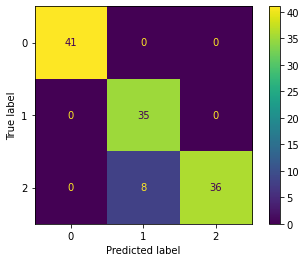

In [204]:
ConfusionMatrixDisplay(confusion_matrix(y_test_f, y_pred_f)).plot()

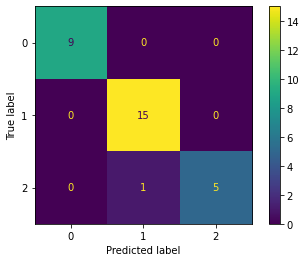

In [205]:
ConfusionMatrixDisplay(confusion_matrix(y_train_f, y_pred_train_f)).plot()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.